In [1]:
import os

from sklearn.utils.class_weight import compute_class_weight

from src.myclassifier import MyClassifier
from src.mymetrics import MyMetric
from src.ppi import PPI

In [2]:
def get_project_rootpath():
    """
    获取项目根目录。此函数的能力体现在，不论当前module被import到任何位置，都可以正确获取项目根目录
    :return:
    """
    path = os.path.realpath(os.curdir)
    while True:
        for subpath in os.listdir(path):
            # PyCharm项目中，'.idea'是必然存在的，且名称唯一
            if '.idea' in subpath:
                return path
        path = os.path.dirname(path)


os.chdir(get_project_rootpath())

In [3]:
EMB_ROOT_PATH = 'data/emb/'
GENECOUNT_PATH = 'data/genecount.xls'
PPI_PATH = 'data/network/PPI-Network.txt'
NODE2VEC_EMB_ROOT_PATH = os.path.join(EMB_ROOT_PATH, 'node2vec')

In [4]:
import numpy as np


def dataloader_node2vec(file_name, positive_gene, risklevel):
    data = file_name.strip('.emb').split('_')
    param = {i[0]: i[1:] for i in data[1:]}

    # 训练特征和label
    file_path = os.path.join(NODE2VEC_EMB_ROOT_PATH, file_name)
    with open(file_path, 'r') as f:
        data = [line.strip().split() for line in f.readlines()[1:]]
    X = [line[1:] for line in data]
    target = [1 if int(line[0]) in positive_gene else 0 for line in data]
    X = np.asarray(X, dtype=float)
    target = np.asarray(target, dtype=int)

    # 权重
    class_weight = compute_class_weight(class_weight='balanced', classes=[0, 1], y=target)
    sample_weights = [risklevel[int(line[0])] * class_weight[1]
                      if int(line[0]) in positive_gene else class_weight[0] for line in data]
    return param, X, target, sample_weights

In [6]:
from sklearn.model_selection import train_test_split
import pickle

ppi = PPI(ppi_network_path=PPI_PATH, gene_count_path=GENECOUNT_PATH, k=6)
datasets = os.listdir(NODE2VEC_EMB_ROOT_PATH)
models = {}
result_acc = {}
result_f1 = {}
result_auc = {}
result_aupr = {}

for dataset in datasets:
    params, X, y, weight = dataloader_node2vec(dataset, ppi.positive_id, ppi.risk_level)
    X_train, X_test, y_train, y_test, weight_train, weights_test = train_test_split(X, y,
                                                                                    weight,
                                                                                    test_size=0.3)
    classifier = MyClassifier()
    classifier.train(X_train, y_train, weight=weight_train)
    y_pred_dict = classifier.predict(X_test)
    y_score_dict = classifier.predict_proba(X_test)
    for clf_name, y_pred in y_pred_dict.items():
        metric = MyMetric(y_test, y_pred)
        acc, f1, auc, aupr = metric.evaluate(y_test, y_pred, y_score_dict[clf_name])
        result_acc[(clf_name, params['d'], params['l'], params['n'], params['q'], params['p'])] = acc
        result_f1[(clf_name, params['d'], params['l'], params['n'], params['q'], params['p'])] = f1
        result_auc[(clf_name, params['d'], params['l'], params['n'], params['q'], params['p'])] = auc
        result_aupr[(clf_name, params['d'], params['l'], params['n'], params['q'], params['p'])] = aupr
        # save the trained model
        model_name = f"{dataset}_{clf_name}_{params['d']}_{params['l']}_{params['n']}_{params['q']}_{params['p']}"
        model_dict = {"model": classifier, "y_pred": y_pred, "acc": acc, "f1": f1, "auc": auc, "aupr": aupr}
        models[model_name] = model_dict

        # add the trained model to models dictionary
        models[model_name] = classifier

# save all models in a file
with open("model/node2vec_all_models.pkl", "wb") as f:
    pickle.dump(models, f)

Finished.
Finished.
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-11703...done.
Finished.
第1次循环的执行时间为: 157.35940654200004秒
第2次循环的执行时间为: 159.88740512500004秒
第3次循环的执行时间为: 154.21761425秒
第4次循环的执行时间为: 160.821519458秒
第5次循环的执行时间为: 157.68039079099992秒
第6次循环的执行时间为: 155.83707629200012秒
第7次循环的执行时间为: 156.70463070799997秒
第8次循环的执行时间为: 157.47949404199994秒
第9次循环的执行时间为: 156.6034433750001秒
第10次循环的执行时间为: 158.65091729100004秒
第11次循环的执行时间为: 157.89441404199988秒
第12次循环的执行时间为: 158.52180966599985秒
第13次循环的执行时间为: 149.972719375秒
第14次循环的执行时间为: 152.28341895799986秒
第15次循环的执行时间为: 151.9550576659999秒
第16次循环的执行时间为: 152.68640966700013秒
第17次循环的执行时间为: 148.57004104099997秒
第18次循环的执行时间为: 150.13526279100006秒
第19次循环的执行时间为: 149.81230237499994秒
第20次循环的执行时间为: 150.3990672

In [9]:
acc_naive

{('128', '40', '20', '1', '1'): 0.5734384662956091,
 ('512', '80', '40', '1', '1'): 0.5638528138528138,
 ('64', '40', '20', '0.25', '0.25'): 0.5681818181818182,
 ('64', '40', '20', '1', '1'): 0.575139146567718,
 ('256', '20', '20', '1', '1'): 0.5742115027829313,
 ('512', '40', '20', '0.5', '0.25'): 0.5695732838589982,
 ('512', '40', '20', '1', '0.5'): 0.5796227581941867,
 ('64', '40', '20', '1', '2'): 0.5739022881880025,
 ('256', '80', '80', '1', '1'): 0.5627705627705628,
 ('512', '40', '20', '0.25', '1'): 0.5677179962894249,
 ('64', '20', '20', '1', '1'): 0.5655534941249227,
 ('256', '40', '20', '1', '1'): 0.5748299319727891,
 ('128', '20', '20', '1', '1'): 0.5680272108843537,
 ('256', '40', '20', '0.25', '2'): 0.564935064935065,
 ('512', '40', '20', '2', '1'): 0.5650896722325294,
 ('256', '40', '20', '2', '0.5'): 0.5841063698206556,
 ('512', '40', '20', '0.25', '2'): 0.5820964749536178,
 ('256', '40', '20', '1', '2'): 0.5740568954854669,
 ('64', '80', '80', '1', '1'): 0.5752937538651

In [10]:
positive_gene_id_set, risk_level = ppi.set_candidate_gene(GENECOUNT_PATH, k=6)
datasets = os.listdir(NODE2VEC_EMB_ROOT_PATH)

acc_forest = {}
f1_forest = {}
auc_forest = {}
aupr_forest = {}
confusion_matrix_forest = {}
pred_forest = {}

for dataset in datasets:
    params, X, y, sample_weights = dataloader_node2vec(dataset, positive_gene_id_set, risk_level)
    model_forest = Cmodel(X, y, sample_weights)
    model_forest.myforest()
    acc, precision, recall, f1, auc, aupr, confusion_matrix = model_forest.evaluation()

    acc_forest[(params['d'], params['l'], params['n'], params['q'], params['p'])] = acc
    f1_forest[(params['d'], params['l'], params['n'], params['q'], params['p'])] = f1
    auc_forest[(params['d'], params['l'], params['n'], params['q'], params['p'])] = auc
    aupr_forest[(params['d'], params['l'], params['n'], params['q'], params['p'])] = aupr
    confusion_matrix_forest[(params['d'], params['l'], params['n'], params['q'], params['p'])] = confusion_matrix
    pred_forest[(params['d'], params['l'], params['n'], params['q'], params['p'])] = model_forest.y_pred

{('128', '40', '20', '1', '1'): 0.9379938251312574,
 ('512', '80', '40', '1', '1'): 0.9425936814741367,
 ('64', '40', '20', '0.25', '0.25'): 0.9375972155391341,
 ('64', '40', '20', '1', '1'): 0.9397083429970161,
 ('256', '20', '20', '1', '1'): 0.9391783534370155,
 ('512', '40', '20', '0.5', '0.25'): 0.9399475984966771,
 ('512', '40', '20', '1', '0.5'): 0.9422639817068029,
 ('64', '40', '20', '1', '2'): 0.9373152618055031,
 ('256', '80', '80', '1', '1'): 0.9411466010057974,
 ('512', '40', '20', '0.25', '1'): 0.9393269459078482,
 ('64', '20', '20', '1', '1'): 0.9358299525656104,
 ('256', '40', '20', '1', '1'): 0.9380560589868178,
 ('128', '20', '20', '1', '1'): 0.937024933684442,
 ('256', '40', '20', '0.25', '2'): 0.9370609789281452,
 ('512', '40', '20', '2', '1'): 0.9378241659100401,
 ('256', '40', '20', '2', '0.5'): 0.940171421154925,
 ('512', '40', '20', '0.25', '2'): 0.9395224740167056,
 ('256', '40', '20', '1', '2'): 0.9370704643761336,
 ('64', '80', '80', '1', '1'): 0.9361440784712

In [15]:
positive_gene_id_set, risk_level = ppi.set_candidate_gene(GENECOUNT_PATH, k=6)
datasets = os.listdir(NODE2VEC_EMB_ROOT_PATH)

acc_svm = {}
f1_svm = {}
confusion_matrix_svm = {}
pred_svm = {}

for dataset in datasets:
    params, X, y, sample_weights = dataloader_node2vec(dataset, positive_gene_id_set, risk_level)
    model_svm = Cmodel(X, y, sample_weights)
    model_svm.mysvm()
    acc, precision, recall, f1, confusion_matrix = model_svm.evaluation_svm()

    acc_svm[(params['d'], params['l'], params['n'], params['q'], params['p'])] = acc
    f1_svm[(params['d'], params['l'], params['n'], params['q'], params['p'])] = f1
    confusion_matrix_svm[(params['d'], params['l'], params['n'], params['q'], params['p'])] = confusion_matrix
    pred_svm[(params['d'], params['l'], params['n'], params['q'], params['p'])] = model_svm.y_pred

In [28]:
import operator


def best_param(performance_indicator):
    max_item = max(performance_indicator.items(), key=operator.itemgetter(1))
    print(max_item)
    return max_item


best_param(aupr_naive)

(('512', '40', '20', '1', '1'), 0.9484320433831703)


(('512', '40', '20', '1', '1'), 0.9484320433831703)

In [37]:
# Import libraries
import matplotlib.pyplot as plt


def result_plotting(performance_indicator):
    x = []
    y = []
    z = []
    for k in performance_indicator.keys():
        a, b, c, _, _ = k
        x.append(int(a))
        y.append(int(b))
        z.append(int(c))

    # Creating figure
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection="3d")

    # Add x, y gridlines
    ax.grid(visible=True, color='grey',
            linestyle='-.', linewidth=0.3,
            alpha=0.2)

    # Creating color map 设置配色图
    my_cmap = plt.get_cmap('hsv')

    # Creating plot
    sctt = ax.scatter3D(x, y, z,
                        alpha=0.8,
                        c=list(performance_indicator.values()),
                        cmap=my_cmap)

    plt.title("simple 3D scatter plot")

    ax.set_xlabel('dim', fontweight='bold')
    ax.set_ylabel('length', fontweight='bold')
    ax.set_zlabel('num', fontweight='bold')
    fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

    # show plot
    plt.show()

In [35]:
def select_p_q(original_indicators: dict):
    return {k: v for k, v in original_indicators.items() if k[-1] == '1' and k[-2] == '1'}

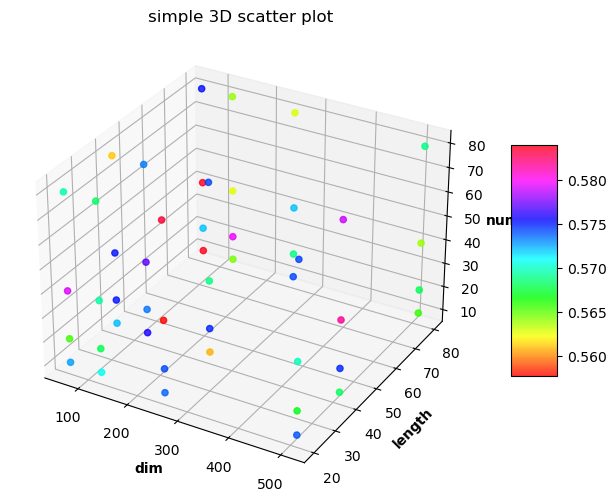

In [38]:
result_plotting(select_p_q(acc_naive))

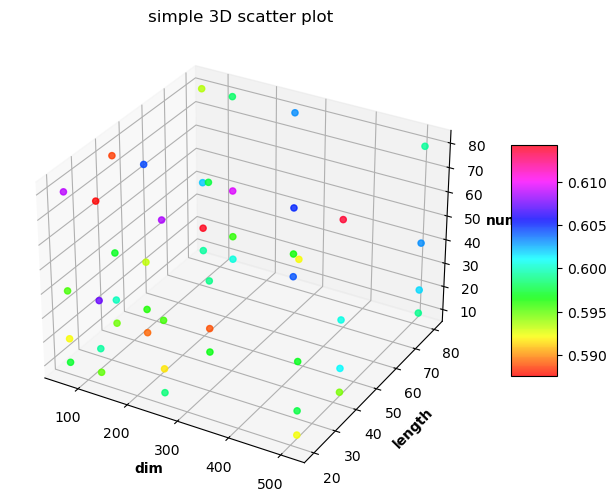

In [39]:
result_plotting(select_p_q(acc_forest))

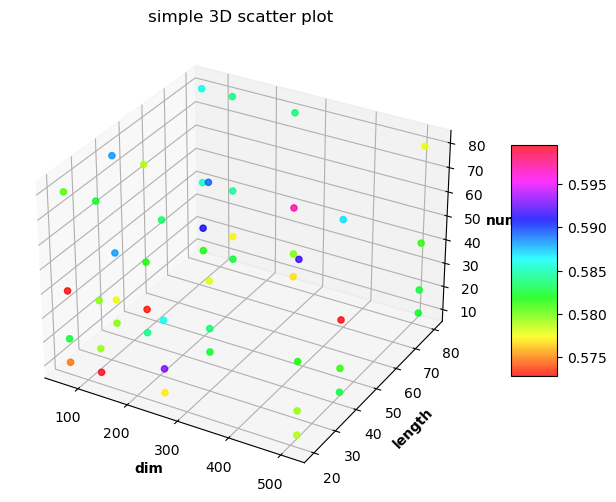

In [40]:
result_plotting(select_p_q(acc_svm))

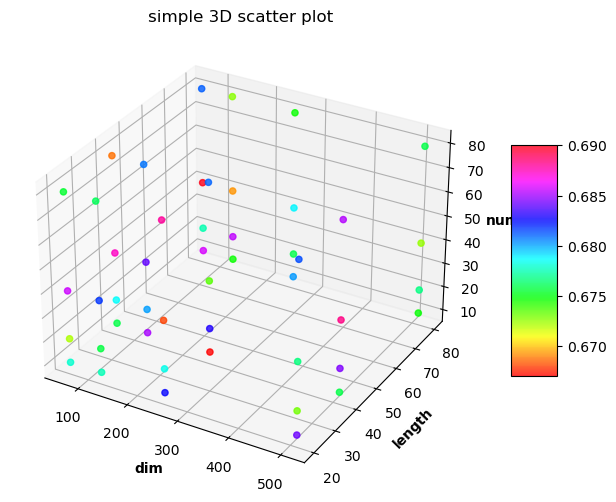

In [41]:
result_plotting(select_p_q(f1_naive))

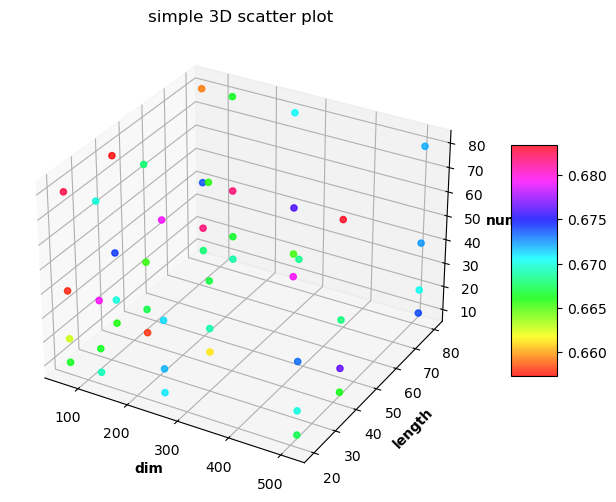

In [42]:
result_plotting(select_p_q(f1_forest))

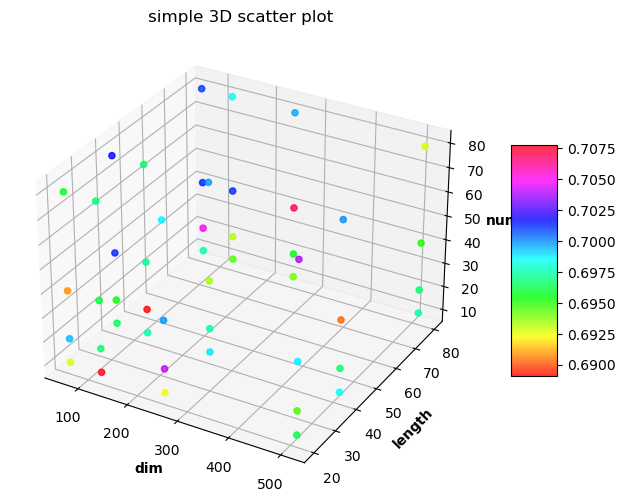

In [43]:
result_plotting(select_p_q(f1_svm))

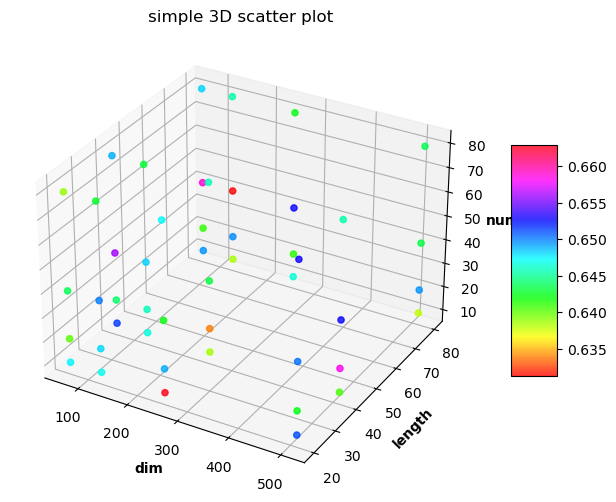

In [44]:
result_plotting(select_p_q(auc_naive))

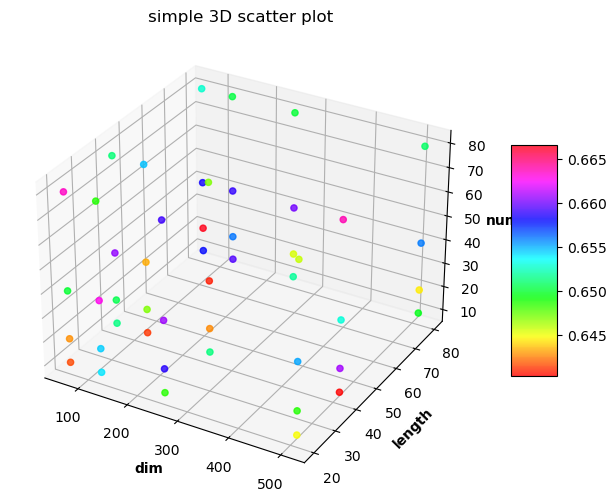

In [45]:
result_plotting(select_p_q(auc_forest))

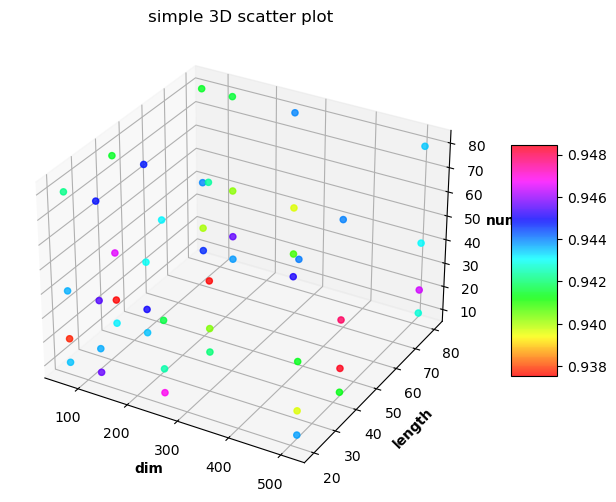

In [47]:
result_plotting(select_p_q(aupr_naive))

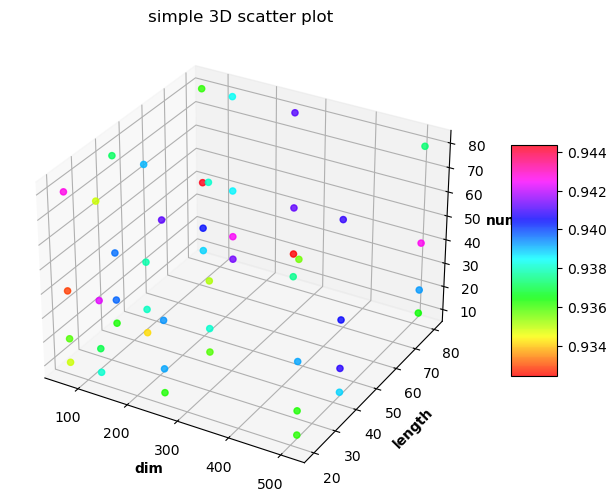

In [48]:
result_plotting(select_p_q(aupr_forest))

In [111]:
import pandas as pd


def select_p_q_dim(original_indicators: dict, dimension):
    source = {(float(k[-2]), float(k[-1])): v for k, v in original_indicators.items() if
              k[-4] == '40' and k[-3] == '20' and k[0] == str(dimension)}
    df = pd.DataFrame(columns=[0.25, 0.5, 1, 2], index=[0.25, 0.5, 1, 2])
    for k, v in source.items():
        df.at[k[0], k[1]] = float(v)
    return df.values.astype(float)


data = select_p_q_dim(acc_svm, 256)

<AxesSubplot: >

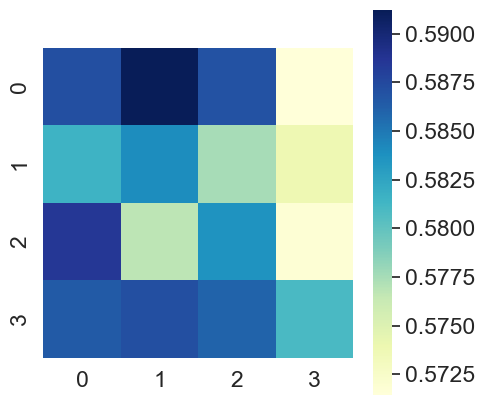

In [112]:
import seaborn as sns

sns.heatmap(data=data, square=True, cmap='YlGnBu')

<AxesSubplot: >

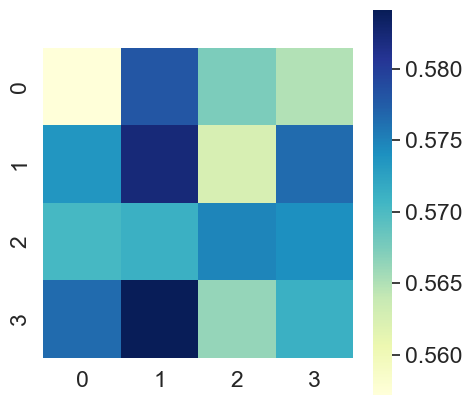

In [113]:
sns.heatmap(data=select_p_q_dim(acc_naive, 256), square=True, cmap='YlGnBu')

<AxesSubplot: >

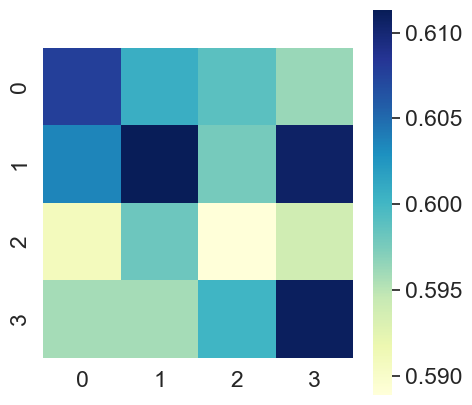

In [114]:
sns.heatmap(data=select_p_q_dim(acc_forest, 256), square=True, cmap='YlGnBu')
